In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def cm_plot(y,yp):
    cm=confusion_matrix(y,yp)
    plt.matshow(cm,cmap=plt.cm.Greens)
    plt.colorbar()
    
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

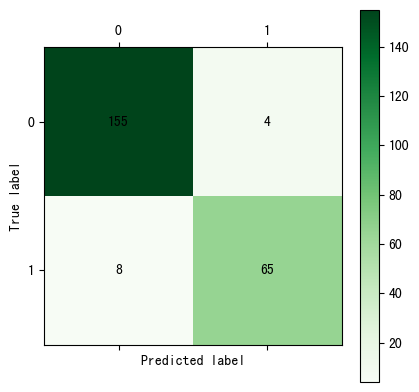

In [4]:
# 将原始数据分为训练数据和测试数据
import pandas as pd
from random import shuffle  # 导入随机函数shuffle，用来打散数据

data = pd.read_excel('./data/model.xls')  # 读取数据，前三列是特征，第四列是标签
data = data.values  # 将表格转成数组
# print(data)
shuffle(data)  # 随机打乱数据

p = 0.8  # 设置训练集比例
train = data[:int(len(data)*p), :]  # 前80%为训练集
test = data[int(len(data)*p):, :]  # 后20%为测试集
# print(train)
# print('\n',test)

from sklearn.tree import DecisionTreeClassifier  # 导入决策树模型
treefile = './tree.pkl'  # 模型输出名字
tree = DecisionTreeClassifier()  # 建立决策树模型
tree.fit(train[:, :3], train[:, 3])

# 保存模型
import joblib  # joblib已经从sklearn.externals库里独立出来，直接导入即可
joblib.dump(tree, treefile)

cm_plot(train[:, 3], tree.predict(train[:, :3])).show()  # 显示混淆矩阵可视化结果
# Scikit-Learn 使用predict方法直接给出预测结果


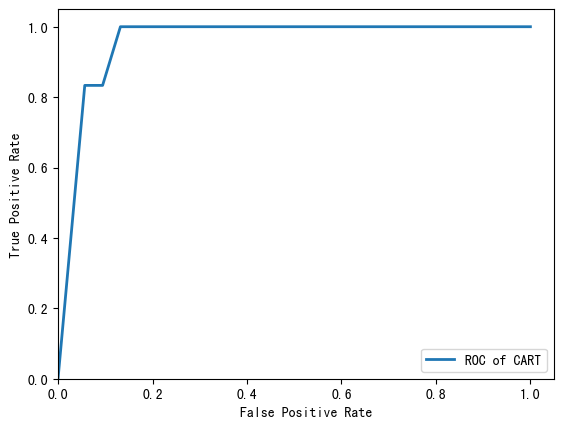

In [5]:
from sklearn.metrics import roc_curve  # 导入ROC曲线函数
fpr, tpr, thresholds = roc_curve(test[:, 3], tree.predict_proba(test[:, :3])[:, 1], pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label='ROC of CART')  # 作出ROC曲线
plt.xlabel('False Positive Rate')  # 坐标轴标签
plt.ylabel('True Positive Rate')  # 坐标轴标签
plt.ylim(0, 1.05)  # 边界范围
plt.xlim(0, 1.05)  # 边界范围
plt.legend(loc=4)  # 图例
plt.show()
